In [26]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Import the data


In [27]:
crop = pd.read_csv("dataset\crop_recommendation_new.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,0,122,200,21.633013,92.551139,5.434435,99.779106,apple
1,0,123,200,22.082933,95.544101,5.602561,72.991061,apple
2,0,123,205,22.027754,92.961295,5.790993,121.134918,apple
3,0,124,199,23.345509,99.150439,5.437313,128.157427,apple
4,0,124,200,21.271503,91.513965,5.345729,149.631558,apple


Understanding the dataset

In [28]:

crop.shape

(11356, 8)

In [29]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11356 entries, 0 to 11355
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            11356 non-null  int64  
 1   P            11356 non-null  int64  
 2   K            11356 non-null  int64  
 3   temperature  11356 non-null  float64
 4   humidity     11356 non-null  float64
 5   ph           11356 non-null  float64
 6   rainfall     11356 non-null  float64
 7   label        11356 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 709.9+ KB


In [30]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [31]:
crop.duplicated().sum()

0

In [32]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000,11356.000000
mean,49.755900,52.895914,47.581895,25.582245,71.252847,6.467340,102.820413
std,36.802003,32.897874,50.063636,5.119463,22.846078,0.817749,60.364512
min,0.000000,5.000000,5.000000,7.231658,9.540611,3.010578,0.000000
25%,20.000000,27.000000,20.000000,22.522757,59.475887,5.928916,60.697750
50%,36.000000,51.000000,32.000000,25.658206,79.756329,6.432352,93.805859
75%,84.000000,68.000000,49.000000,28.603242,88.987183,6.956473,137.001136
max,144.000000,149.000000,205.000000,44.929083,100.000000,10.406061,335.913070


Exploring Data

In [33]:
numerical_columns = crop.select_dtypes(include=['int64', 'float64'])
corr = numerical_columns.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.240457,-0.136101,0.031039,0.196508,0.099418,0.039303
P,-0.240457,1.000000,0.729704,-0.145321,-0.129128,-0.116988,-0.053143
K,-0.136101,0.729704,1.000000,-0.179345,0.181049,-0.150987,-0.048681
temperature,0.031039,-0.145321,-0.179345,1.000000,0.213982,-0.018363,-0.027855
humidity,0.196508,-0.129128,0.181049,0.213982,1.000000,-0.011025,0.083287
ph,0.099418,-0.116988,-0.150987,-0.018363,-0.011025,1.000000,-0.107101
rainfall,0.039303,-0.053143,-0.048681,-0.027855,0.083287,-0.107101,1.000000


<Axes: >

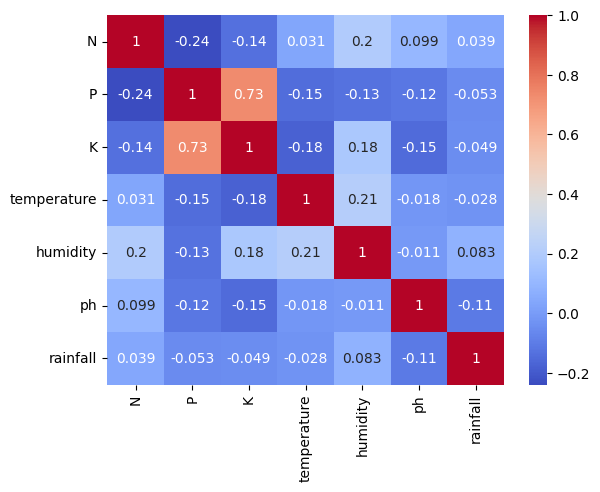

In [34]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [35]:
crop['label'].value_counts()

label
muskmelon      570
kidneybeans    566
chickpea       556
watermelon     539
coconut        538
blackgram      535
mungbean       526
mango          518
pomegranate    514
mothbeans      512
maize          510
apple          508
grapes         507
papaya         504
lentil         502
cotton         500
pigeonpeas     500
rice           500
orange         496
banana         492
coffee         484
jute           479
Name: count, dtype: int64

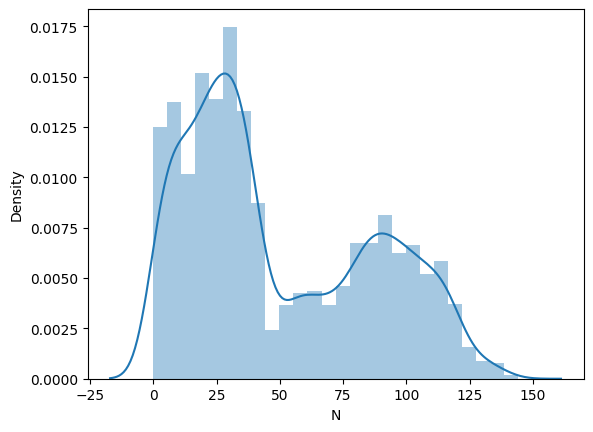

In [36]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

Encoding and Train Test Split

In [37]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

y = crop['label'].map(crop_dict)
x = crop.drop(['label'],axis = 1)

print(x)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

         N    P    K  temperature   humidity        ph    rainfall
0        0  122  200    21.633013  92.551139  5.434435   99.779106
1        0  123  200    22.082933  95.544101  5.602561   72.991061
2        0  123  205    22.027754  92.961295  5.790993  121.134918
3        0  124  199    23.345509  99.150439  5.437313  128.157427
4        0  124  200    21.271503  91.513965  5.345729  149.631558
...    ...  ...  ...          ...        ...       ...         ...
11351  122   24   47    23.805890  85.744291  5.894879   80.218401
11352  122   27   51    27.250909  79.336644  6.670764   10.978471
11353  123   21   56    24.869113  80.811081  6.503131   36.950146
11354  124   16   52    23.859353  82.592168  6.463001   72.213810
11355  124   22   49    28.374211  92.326838  6.484354   82.619695

[11356 rows x 7 columns]
Shape of x: (11356, 7)
Shape of y: (11356,)


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#Training and Testing Sets for Validation of Results
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print("The shape of x train:", x_train.shape)
print("The shape of x test:", x_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of x train: (9084, 7)
The shape of x test: (2272, 7)
The shape of y train: (9084,)
The shape of y test: (2272,)



Training Models

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(x_train,y_train)
    ypred = md.predict(x_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.894806338028169
Naive Bayes  with accuracy : 0.965669014084507
Support Vector Machine  with accuracy : 0.9273767605633803
K-Nearest Neighbors  with accuracy : 0.9300176056338029
Decision Tree  with accuracy : 0.9419014084507042
Random Forest  with accuracy : 0.9731514084507042
Bagging  with accuracy : 0.9639084507042254
AdaBoost  with accuracy : 0.09507042253521127
Gradient Boosting  with accuracy : 0.9647887323943662
Extra Trees  with accuracy : 0.878080985915493


In [41]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred = rfc.predict(x_test)
accuracy_score(y_test,ypred)

0.9713908450704225

In [42]:
#Printing Classification Report
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

           1       0.93      0.81      0.87       108
           2       0.98      0.99      0.99       114
           3       0.83      0.92      0.87       102
           4       0.99      0.99      0.99        87
           5       0.99      0.99      0.99       111
           6       0.98      1.00      0.99       102
           7       1.00      1.00      1.00       116
           8       1.00      0.99      1.00       102
           9       0.97      0.93      0.95       114
          10       0.93      0.97      0.95       102
          11       0.99      1.00      1.00       113
          12       0.99      1.00      1.00       101
          13       1.00      1.00      1.00        83
          14       0.99      0.99      0.99       111
          15       0.89      0.92      0.91        92
          16       0.94      0.92      0.93       110
          17       1.00      1.00      1.00       108
          18       0.98    

Predictive System

In [43]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    # transformed_features = ms.fit_transform(features)
    # transformed_features = sc.fit_transform(transformed_features)
    # prediction = rfc.predict(transformed_features).reshape(1,-1)
    prediction = rfc.predict_proba(features)
    prediction1 = rfc.predict(features)


    crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

    top3_classes = np.argsort(prediction[0])[-5:]
    top3_crops = [crop_dict[idx + 1] for idx in top3_classes]
    top3_crops.reverse()
    print("Best crop to be cultivated: ", crop_dict[prediction1[0]])
    print("Top 5 best crops to be cultivated after the 1st one:", top3_crops)

    # if prediction[0] in crop_dict:
    #     crop = crop_dict[prediction[0]]
    #     print("{} is a best crop to be cultivated ".format(crop))
    # else:
    #     print("Sorry there's no proper crop for this environment")

    
    return prediction[0] 

In [ ]:
N = 104	
P = 35
k = 28
temperature = 27.51006055
humidity = 50.66687215
ph = 6.983732393
rainfall =143.9955548
predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)



Best crop to be cultivated:  Coffee
Top 5 best crops to be cultivated after the 1st one: ['Coffee', 'Rice', 'Jute', 'Maize', 'Coconut']


In [45]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))